In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
yelpconn = sqlite3.connect('C:/Users/navo1/Desktop/Yelp Labs/yelpData.sqlite3')

### Create Dataframes for both the Sentiment and Word Count and merge


In [3]:
sentimentdf = pd.read_sql_query("SELECT * FROM sentiment_textblob", yelpconn)

In [19]:
wcdf = pd.read_sql_query("SELECT review_id, WC, stars FROM review", yelpconn)

In [20]:
mergedf = sentimentdf.merge(wcdf, on="review_id")

### Look at Statistics

In [21]:
mergedf.head()

,review_id,polarity,subjectivity,WC,stars
0,Q1sbwvVQXV2734tPgoKj4Q,-0.333333,0.616667,39,1
1,GJXCdrto3ASJOqKeVWPi6Q,0.315810,0.536668,288,5
2,2TzJjDVDEuAW6MR5Vuc1ug,0.429125,0.584000,113,5
3,yi0R0Ugj_xUx_Nek0-_Qig,0.832500,0.885000,65,5
4,11a8sVPMUFtaC7_ABRkmtw,0.049277,0.432407,673,1


In [8]:
mergedf['WC'].min()

1

In [9]:
mergedf['WC'].max() 'There is a character limit of 5000'

4329

In [13]:
mergedf['WC'].describe() 

count    6.685900e+06
mean     1.125804e+02
std      1.065829e+02
min      1.000000e+00
25%      4.400000e+01
50%      8.000000e+01
75%      1.430000e+02
max      4.329000e+03
Name: WC, dtype: float64

##### What constitutues as enough words?


#### Looks like average word count for a review is 112. So lets look at reviews above 112

In [14]:
mergedf.loc[mergedf['WC'] > 112]

,review_id,polarity,subjectivity,WC
1,GJXCdrto3ASJOqKeVWPi6Q,0.315810,0.536668,288
2,2TzJjDVDEuAW6MR5Vuc1ug,0.429125,0.584000,113
4,11a8sVPMUFtaC7_ABRkmtw,0.049277,0.432407,673
5,fdiNeiN_hoCxCMy2wTRW9g,0.238157,0.619437,295
6,G7XHMxG0bx9oBJNECG4IFg,0.148851,0.545361,243
8,qrffudO73zsslZbe8B9D3Q,0.227130,0.568201,264
10,kbtscdyz6lvrtGjD1quQTg,0.061458,0.325347,130
12,Z7wgXp98wYB57QdRY3HQ3w,0.602879,0.806548,212
14,JVcjMhlavKKn3UIt9p9OXA,-0.378929,0.646548,190
17,6BnQwlxRn7ZuWdzninM9sQ,-0.038269,0.588608,373


### Still 2 million reviews greater than 112 words

#### Lets look at subjectivity and polarity based on Wordcount 

(array([   1872.,    2319.,   20579.,  148450.,  648910., 1003470.,
         429455.,   59330.,    4087.,    1476.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

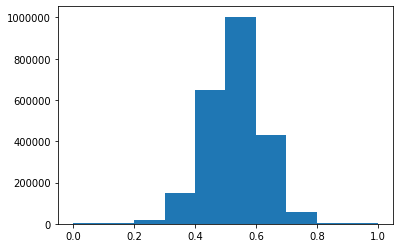

In [23]:
plt.hist(mergedf.loc[mergedf['WC'] > 112, 'subjectivity'])

### 0.5-0.6 subjectivity for most reviews meaning neither fact no opinion 

### Look at reviews with wordcount between a wordcount difference of 100 words

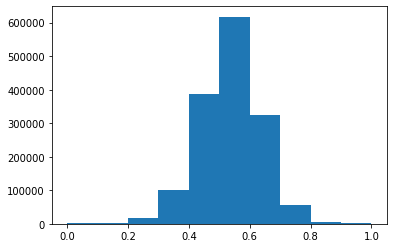

In [32]:
hunrev = plt.hist(mergedf.loc[mergedf['WC'].between(112, 212), 'subjectivity'])

In [34]:
mergedf.loc[mergedf['WC'].between(112, 212)].describe()

,polarity,subjectivity,WC,stars
count,1.510016e+06,1.510016e+06,1.510016e+06,1.510016e+06
mean,1.784556e-01,5.365479e-01,1.524949e+02,3.466665e+00
std,1.615924e-01,9.869511e-02,2.824744e+01,1.479493e+00
min,-1.000000e+00,0.000000e+00,1.120000e+02,1.000000e+00
25%,7.817460e-02,4.754286e-01,1.280000e+02,2.000000e+00
50%,1.907053e-01,5.397222e-01,1.480000e+02,4.000000e+00
75%,2.889380e-01,6.014617e-01,1.750000e+02,5.000000e+00
max,1.000000e+00,1.000000e+00,2.120000e+02,5.000000e+00


(array([2.06000e+02, 2.30000e+02, 3.35200e+03, 3.00500e+04, 1.49334e+05,
        2.32952e+05, 7.99850e+04, 5.26200e+03, 2.07000e+02, 2.66000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

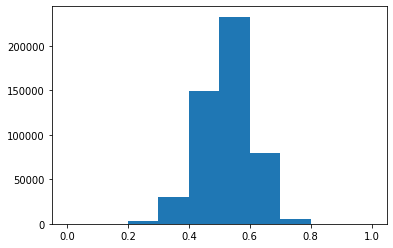

In [35]:
plt.hist(mergedf.loc[mergedf['WC'].between(212, 312), 'subjectivity'])

(array([3.5000e+01, 4.2000e+01, 8.9600e+02, 1.0672e+04, 6.2395e+04,
        9.2336e+04, 2.2101e+04, 6.8300e+02, 3.5000e+01, 4.5000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

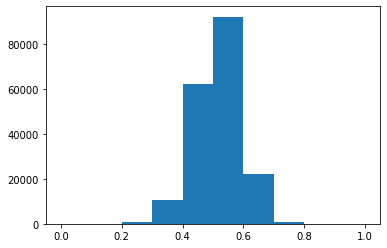

In [36]:
plt.hist(mergedf.loc[mergedf['WC'].between(312, 412), 'subjectivity'])

(array([1.100000e+02, 1.800000e+02, 1.838000e+03, 2.645600e+04,
        2.747530e+05, 1.025754e+06, 8.764390e+05, 1.110190e+05,
        3.017000e+03, 3.820000e+02]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

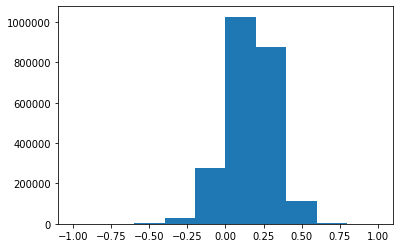

In [24]:
plt.hist(mergedf.loc[mergedf['WC'] > 112, 'polarity'])

### 0.2 - 0.25 polarity for most reviews , leaning towards more positive sentiment than negative

## Can word count also affect star rating 

(array([459746.,      0., 259885.,      0.,      0., 332673.,      0.,
        553416.,      0., 714228.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

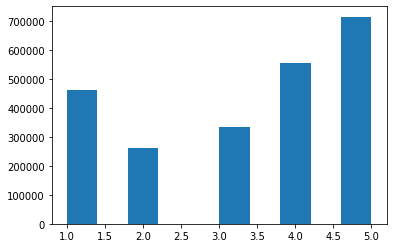

In [29]:
plt.hist(mergedf.loc[mergedf['WC'] > 112, 'stars'])

###  Higher chance of getting 5 stars with a review greater than 100 words

### But there are still about 450,000 reviews with a 1 star

(array([3., 0., 3., 0., 0., 3., 0., 7., 0., 7.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

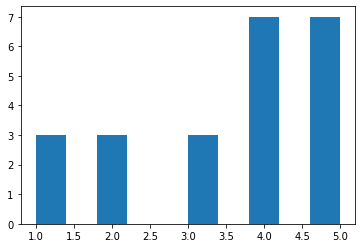

In [26]:
plt.hist(mergedf.loc[mergedf['WC'] > 1112, 'stars'])

### Fewer reviews with 1112 but more 5 stars than 1 star

(array([265739.,      0., 155144.,      0.,      0., 210202.,      0.,
        366569.,      0., 512362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

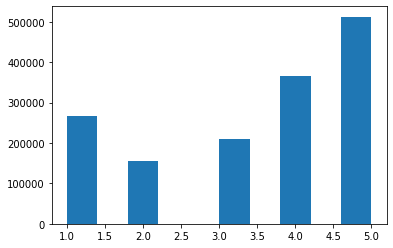

In [39]:
plt.hist(mergedf.loc[mergedf['WC'].between (112,212), 'stars'])

### 1 million Reviews between 112 words to 212 words look similar to the 2 million reviews greater than 112 words